# Part 1

 ### imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### classes

In [2]:
# define a polynomial regression class
# this class takes in a value k for the number
# of feature vectors (polynomial order minus one)
# and the set of features and labels as numpy arrays
# note it only works for 1-dimensional features

class polynomial_regression:
    def __init__(self, k, features, labels):
        self.k = k
        self.features = features
        self.labels = labels
        self.design = np.array([])
        self.w = np.array([])
        self.err = 0
        self.test_error = 0
        
    # run this method to train
    # creates the vector w of weights (same size as k)
    def train(self):
        
        # make design Nxk matrix where each column k is sin(data*pi*k) and N, the length of the data vector
        self.design = np.array([self.features**i for i in range(self.k)]).T
            
        # find the weights
        # using the pseudo inverse .pinv for stability: large matrices have trouble being inverted
        self.w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(self.design.T,self.design)),self.design.T),self.labels)
        
    # define the output polynomial function for plotting
    # takes in as input a scalar value x and outputs scalar y
    def function(self, x):
        
        y = 0
        for i in range(self.k):
            y += self.w[i]*x**i
        return y

    # define the mean-squared error function
    # outputs a scalar
    def error(self):
        for i in range(len(self.labels)):
            self.err += (self.labels[i] - self.function(self.features[i]))**2
        self.err = self.err / len(self.labels)
        return self.err

    # similar function that can take any dataset as input, to use for finding 
    # the error on the test set, scalar output
    def error_to_test(self, x, y):
      for i in range(len(y)):
          self.test_error += (y[i] - self.function(x[i]))**2
      self.test_error = self.test_error / len(y)
      return self.test_error



# define a class to generate different types of data
# takes in the number of data points we want to generate
class generate_data:
  def __init__(self, number):

    # we use the gaussian parameters given to us in the question
    self.number = number
    self.gaussmean = 0
    self.gaussstd = 0.07
  
  def sinfuncsqr(self):
    # we generate data that follows the sine squared function with gaussian error
    # outputs a the generated (x,y)
    data = np.random.random_sample((self.number,))
    error = np.random.normal(self.gaussmean, self.gaussstd, self.number)
    f = lambda x: np.sin(2*np.pi*x)**2
    return data, f(data) + error
  


# defining a class that does sinusoidal regression 
# inputs are the features and the labels of the training set
class sinusoidal_regression: 
    def __init__(self, k, features, labels):
        self.k = k
        self.features = features
        self.labels = labels
        self.design = np.array([])
        self.w = np.array([])
        self.err = 0
        self.test_error = 0
        
    # run this method to train
    # creates the vector w of weights (same size as k)
    def train(self):
        
        # make design Nxk matrix where each column k is sin(data*pi*k) and N, the length of the data vector
        self.design = np.sin(np.array([self.features*np.pi*i for i in range(self.k)])).T
            
        # find the weights w= (X^t X)^-1 (X^t y)
        # using the pseudo inverse .pinv for stability: large matrices have trouble being inverted
        self.w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(self.design.T,self.design)),self.design.T),self.labels)
        
    # define the output sine function for plotting
    # takes in a scalar x and outputs scalar y
    def function(self, x):
        y = 0
        for i in range(self.k):
            y += self.w[i] * np.sin(np.pi*x*i)
        return y 

     # define the mean-squared error function
    def error(self):
        for i in range(len(self.labels)):
            self.err += (self.labels[i] - self.function(self.features[i]))**2
        self.err = self.err / len(self.labels)
        return self.err

    # similar function that can take any dataset as input, to use for finding 
    # the error on the test set, scalar output
    def error_to_test(self, x, y):
      for i in range(len(y)):
          self.test_error += (y[i] - self.function(x[i]))**2
      self.test_error = self.test_error / len(y)
      return self.test_error 

## 1.1 Linear regression


### 1.1.1

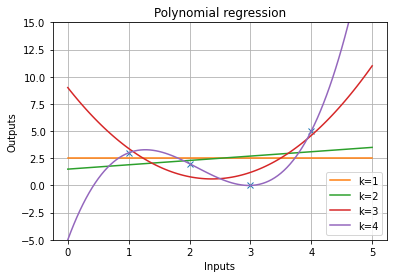

In [3]:
# Question 1.1.1 part a

# import data
inputs = np.array([1,2,3,4])
outputs = np.array([3,2,0,5])

# train our four models
poly1 = polynomial_regression(1, inputs, outputs)
poly1.train()

poly2 = polynomial_regression(2, inputs, outputs)
poly2.train()

poly3 = polynomial_regression(3, inputs, outputs)
poly3.train()

poly4 = polynomial_regression(4, inputs, outputs)
poly4.train()

# plot the models
x = np.linspace(0,5,101)
plt.figure(1)
plt.plot(inputs, outputs, 'x')
plt.plot(x,poly1.function(x), label = 'k=1')
plt.plot(x,poly2.function(x), label = 'k=2')
plt.plot(x,poly3.function(x), label = 'k=3')
plt.plot(x,poly4.function(x), label = 'k=4')
plt.ylim([-5,15])
plt.title('Polynomial regression')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.grid()
plt.legend()
plt.show()
plt.close()

In [4]:
# Question 1.1.1 part b

print('Polynomial order 1 function is: \ny = {:.3f}'.format(poly1.w[0]))
print('Polynomial order 2 function is: \ny = {:.3f} + {:.3f}x'.format(poly2.w[0],poly2.w[1]))
print('Polynomial order 3 function is: \ny = {:.3f} + {:.3f}x + {:.3f}x\xb2'.format(poly3.w[0],poly3.w[1],poly3.w[2]))
print('Polynomial order 4 function is: \ny = {:.3f} + {:.3f}x + {:.3f}x\xb2 + {:.3f}x\xb3'.format(poly4.w[0],poly4.w[1],poly4.w[2],poly4.w[3]))

Polynomial order 1 function is: 
y = 2.500
Polynomial order 2 function is: 
y = 1.500 + 0.400x
Polynomial order 3 function is: 
y = 9.000 + -7.100x + 1.500x²
Polynomial order 4 function is: 
y = -5.000 + 15.167x + -8.500x² + 1.333x³


In [5]:
# Question 1.1.1 part c

print('Mean error on polynomial order 1 is: \n{:.3f}'.format(poly1.error()))
print('Mean error on polynomial order 2 is: \n{:.3f}'.format(poly2.error()))
print('Mean error on polynomial order 3 is: \n{:.3f}'.format(poly3.error()))
print('Mean error on polynomial order 4 is: \n{:.3f}'.format(poly4.error()))

Mean error on polynomial order 1 is: 
3.250
Mean error on polynomial order 2 is: 
3.050
Mean error on polynomial order 3 is: 
0.800
Mean error on polynomial order 4 is: 
0.000


### 1.1.2

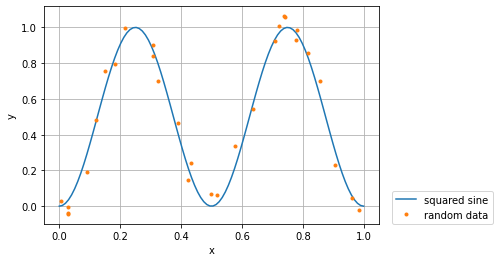

In [6]:
#1.1.2.a
# Plotting the function
x = np.linspace(0,1,100)
f = lambda x: np.sin(2*np.pi*x)**2
plt.plot(x, f(x),label="squared sine")

# Plotting 30 random data points and 30 random error values
xdataset, ydataset = generate_data(30).sinfuncsqr()
  
# we can now plot the points on top of the function
plt.plot(xdataset,ydataset, ".",label="random data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc=(1.04,0))
plt.show()
plt.close()

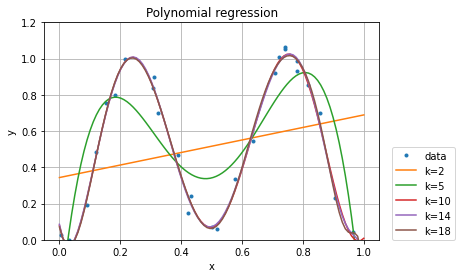

In [7]:
plt.plot(xdataset, ydataset, ".", label="data")
k = [2,5,10,14,18]

# to plot the errors for part b
partb = []
for basis in k:

  # We find the weights for each order polynomial requested
   polyfit = polynomial_regression(basis, np.array(xdataset), np.array(ydataset))
   polyfit.train()
   func = polyfit.function(x)
   plt.plot(x,func, label="k={}".format(basis))
   partb.append((basis, polyfit.error()))

# Plotting the fit
plt.axis(ymin=0, ymax=1.2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title("Polynomial regression")
plt.legend(loc=(1.04,0));

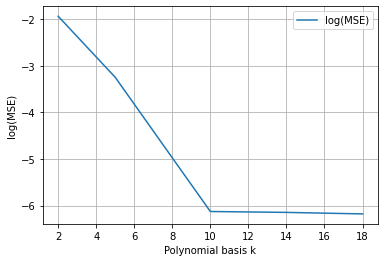

In [8]:
# 1.1.2.b
# Plotting the training error (MSE) vs the order polynomial
x, y = zip(*partb)
plt.plot(x, np.log(y),label="log(MSE)")
plt.legend()
plt.grid()
plt.xlabel("Polynomial basis k")
plt.ylabel("log(MSE)");

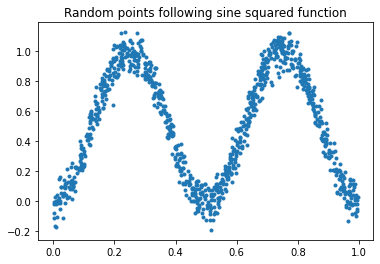

In [9]:
# 1.1.2.c

# Plotting 1000 random data points with 1000 random error values
xtest, ytest = generate_data(1000).sinfuncsqr()
  
# we can plot our points
plt.plot(xtest, ytest, ".")
plt.title("Random points following sine squared function");

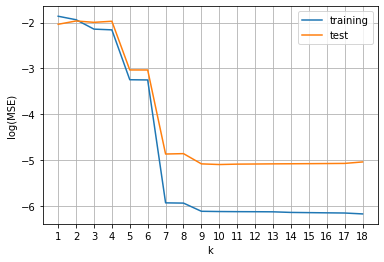

In [10]:
# we create lists in which we can save the data
MSEtest = []
MSEtrain = []

for k in range(1,19):

  # We find the weights for each order polynomial requested
   polyfit = polynomial_regression(k, np.array(xdataset), np.array(ydataset))
   polyfit.train()
   error = polyfit.error_to_test(xtest, ytest)
   MSEtrain.append((k, polyfit.error()))
   MSEtest.append((k, error))

# we can now plot both MSEs against k
x, y = zip(*MSEtest)
z,w = zip(*MSEtrain)
plt.plot(z,np.log(w),label="training")
plt.plot(x,np.log(y),label="test")
plt.grid()
plt.legend()
plt.xlabel("k")
plt.ylabel("log(MSE)")
plt.xticks([i for i in range(1,19)]);

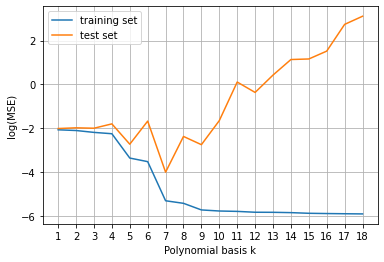

In [11]:
# 1.1.2.d
# we will store the mean square error for each run and 
# each polynomial basis in a dataframe as we have two dimensions: run and order
# we follow the same convention as the question: t for test and s for training
dfmse_t = pd.DataFrame()
dfmse_s = pd.DataFrame()

# we run 100 runs with pseudo-random points every time
for run in range(0,100):
  
  # we use the class that generates data automatically following the 
  # sine squared function + gaussian noise
  # 30 for training set, and 1000 for test set
  x, y = generate_data(30).sinfuncsqr()
  xtest, ytest = generate_data(1000).sinfuncsqr()

  # we append the mse values in a dictionary for each run
  msedict_s = {}
  msedict_t = {}

  # we run the polynomial regression each time
  for k in range(1,19):
    polyfit = polynomial_regression(k, x, y)
    polyfit.train()
  
    # we save everything in dictionaries indexed with basis
    msedict_s[k] = polyfit.error()
    msedict_t[k] = polyfit.error_to_test(xtest, ytest)
  
  # converting the dictionaries to pandas series to add them to dataframes 
  # indexed by run
  dfmse_t[run] = pd.Series(msedict_t)
  dfmse_s[run] = pd.Series(msedict_s)

# we find the mean accross all runs (axis=1) for a certain polynomial basis
# this is a list 
averaged_mse_t = np.array(dfmse_t.mean(1).tolist())
averaged_mse_s = np.array(dfmse_s.mean(1).tolist())

# we log the average for plotting
loged_mse_t = np.log(averaged_mse_t)
loged_mse_s = np.log(averaged_mse_s)

# plotting for all basis
plt.plot([i for i in range(1,19)], loged_mse_s)
plt.plot([i for i in range(1,19)], loged_mse_t)
# we add the necessary info to our plot
plt.legend(["training set", "test set"])
plt.grid()
plt.xlabel("Polynomial basis k")
plt.xticks([i for i in range(1,19)])
plt.ylabel("log(MSE)");

### 1.1.3

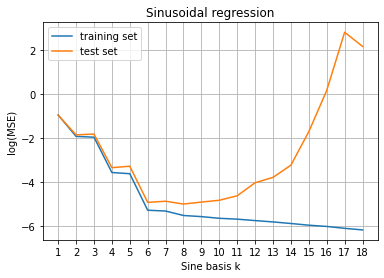

In [12]:
# 1.1.3
# we follow the same procedure as in 1.1.2d but create a new class that does sinus 
# based regression rather than polynomial regression
# the class is extremely similar in terms of both methods and inputs/outputs
dfmse_t = pd.DataFrame()
dfmse_s = pd.DataFrame()

# we do 100 runs
for run in range(0,100):
  # generate the necessary points for our run
  x, y = generate_data(30).sinfuncsqr()
  xtest, ytest = generate_data(1000).sinfuncsqr()

  # we append the mse values in a dictionary for each run
  msedict_s = {}
  msedict_t = {}

  # This time we use our sinusoidal regression class, similar to our 
  # polynomial regression class
  for k in range(1,19):
    sinfit = sinusoidal_regression(k, x, y)
    sinfit.train()

    # we append results 
    msedict_s[k] = sinfit.error()
    msedict_t[k] = sinfit.error_to_test(xtest, ytest)
    
    # we now add the dicts to the dataframes
  dfmse_t[run] = pd.Series(msedict_t)
  dfmse_s[run] = pd.Series(msedict_s)
  
# We now follow the exact same process as previously to plot
averaged_mse_t = np.array(dfmse_t.mean(1).tolist())
averaged_mse_s = np.array(dfmse_s.mean(1).tolist())

# logging the average list of MSEs
loged_mse_t = np.log(averaged_mse_t)
loged_mse_s = np.log(averaged_mse_s)

plt.plot([i for i in range(1,19)], loged_mse_s)
plt.plot([i for i in range(1,19)], loged_mse_t)

plt.legend(["training set", "test set"])
plt.grid()
plt.xlabel("Sine basis k")
plt.ylabel("log(MSE)")
plt.title("Sinusoidal regression")
plt.xticks([i for i in range(1,19)]);

## 1.2 Filtered Boston housing and kernels

In [13]:
# creating classes for the question
class train_test_split:

  def __init__(self, data, split_ratio):

    # training/data ratio
    self.split_ratio = split_ratio

    # dataframe 
    self.data = data

    # scalar
    self.index_size = self.data.shape[0]
  
  def splitting(self):

    # we want to split the data set RANDOMLY into test set and training set
    # we first define how many datapoints will be in the training set
    training_points = int(round(self.index_size * self.split_ratio, 0))
    # we create new dataframes as we want to keep the original data untouched
    training_data = pd.DataFrame()
    test_data = self.data

    # we take a random sample of the raw data, with no redraw so we don't have duplicate data
    row_numbers = random.sample(range(0, self.index_size), training_points)

    # we define these random datapoints as the training set
    training_data= test_data.iloc[row_numbers]

    # the test set is thus raw data-training data
    test_data = test_data.drop(index=row_numbers)

    # we reset the dataframe indices to avoid later problems
    training_data = training_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    # we return 2 dataframes, test and training data
    return training_data, test_data
  
  def five_fold_validation(self, slice_number):
    # we make a method that splits the data into five sets
    # there is no randomness needed here because the training set is already random splitted

    # this takes as input the slice number 0-4 which tells us which slice of 
    # the training set we are choosing as our validation set

    # we find the lower and upper bounds of the validation set dataframe index 
    lower = int(round(slice_number*self.index_size/5, 0))
    upper = int(round((slice_number+1)*self.index_size/5, 0))

    # we find this set in the data
    validation_set = self.data.iloc[lower:upper]

    # the rest is the cross-validation training set
    training_set = self.data[~self.data.isin(validation_set)].dropna(how = 'all')
    
    return training_set, validation_set

# we define a class similar to polynomial regression but can take a large multi-attribute dataset as input (matrix)
class attribute_linreg:
  
  def __init__(self, data, labels):

    self.data = data
    self.labels = labels
    self.w = np.array([]) # the weights: vector
    self.err = 0
    self.test_error = 0
    self.features = self.data.shape[1] # the number of features: scalar

  
  def train(self):    
    # run this method to train/ find the weights
    # using the pseudo inverse .pinv for stability: large matrices have trouble being inverted

    self.w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(self.data.T,self.data)),self.data.T), self.labels)
  
  def function(self, x):
    # the function is the weights times the data
    # vector input, scalar output
    y = 0 

    for i in range(self.features):
        y += self.w[i]*x[i]

    return y

    
  def error(self):
    # define the mean-squared error function
    # scalar output

        for i in range(len(self.labels)):
            self.err += (self.labels[i] - self.function(self.data[i]))**2
        self.err = self.err / len(self.labels)

        return self.err

       
  def error_to_test(self, x, y):
    # similar function that can take any dataset as input 
    # matrix and vector inputs respectively and scalar output

    for i in range(len(y)):
        self.test_error += (y[i] - self.function(x[i]))**2
    self.test_error = self.test_error / len(y)

    return self.test_error

### 1.2.4

In [14]:
# here we use pandas for the dataset in order to be able to clearly know which column we are looking at.
# This has drawbacks: we have to convert to numpy to compute things (but the method to do so is straightforward).
data = pd.read_csv("http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv")

In [15]:
#1.2.ab 
# naive regression with vector of ones

MSE_train = []
MSE_test = []
split = 2/3

for run in range(20):
  # splitting different training and test sets for each run
  training, test = train_test_split(data, split).splitting()

  # we create vectors of ones
  onestrain = np.ones((training.shape[0], 1))
  onestest = np.ones((test.shape[0], 1))
  
  # we use the vector of ones as the data to predict the labels
  linreg = attribute_linreg(onestrain, training["MEDV"].to_numpy())
  linreg.train()
  MSE_train.append(linreg.error())

  # finding the error to the test set
  MSE_test.append(linreg.error_to_test(onestest, test["MEDV"].to_numpy()))

print("Training mean error and std: {:.2f}+/-{:.2f}".format(np.mean(MSE_train),np.std(MSE_train)))
print("Testing mean error and std: {:.2f}+/-{:.2f}".format(np.mean(MSE_test),np.std(MSE_test)))
print("What we have done here is fit the constant function equal to the mean of the training set labels, to the data, f(x)={}, mean of training set={}".format(linreg.w[0], np.mean(training["MEDV"].to_numpy())))

Training mean error and std: 84.29+/-5.18
Testing mean error and std: 84.94+/-10.46
What we have done here is fit the constant function equal to the mean of the training set labels, to the data, f(x)=22.61008902077151, mean of training set=22.610089020771515


In [16]:
#1.2.c

# linear regression for single attributes
# we create arrays to save all our data, there are 12 attributes and 20 runs
training_array = np.zeros((20, 12))
test_array = np.zeros((20, 12))
split = 2/3

for run in range(20):

  # We split the data into test and a training sets for each run
  # we are loading the data with pandas so we have to convert to numpy
  training, test = train_test_split(data, split).splitting()

  # training data
  train_features = training.drop(columns=["MEDV"])
  train_labels = training["MEDV"].to_numpy()
  # just to not have a (N,) dimension for later
  train_labels = np.expand_dims(train_labels, axis=1)

  #test data
  test_features = test.drop(columns=["MEDV"])
  test_labels = test["MEDV"].to_numpy()
  test_labels = np.expand_dims(test_labels, axis=1)

  # we loop through the features and perform linear regression each time
  # we keep an index to increment our arrays
  i = 0
  for attributes in train_features.columns:

    # we create the attribute data with the bias term
    train_attribs = train_features[attributes].to_numpy()
    train_attribs = np.expand_dims(train_attribs, axis=1)
    # we concatenate with a vector of ones (bias term)
    train_attribs = np.concatenate((train_attribs, np.ones((train_attribs.shape))),axis=1)

    # we do the same for test data
    test_attribs = test_features[attributes].to_numpy()
    test_attribs = np.expand_dims(test_attribs, axis=1)
    test_attribs = np.concatenate((test_attribs, np.ones((test_attribs.shape))),axis=1)
    
    # we perform linear regression and save all the mse data in arrays
    linreg = attribute_linreg(train_attribs, train_labels)
    linreg.train()

    training_array[run, i] = linreg.error()
    test_array[run, i] = linreg.error_to_test(test_attribs, test_labels)
    # we increment our index for the attributes
    i += 1

In [17]:
# we can print our results
print("Train        Test")
for i in range(len(np.mean(training_array, axis=0))):
  print("{:.2f}+/-{:.2f}".format(np.mean(training_array,axis=0)[i],np.std(training_array[:,i])),"|{:.2f}+/-{:.2f}".format(np.mean(test_array,axis=0)[i],np.std(test_array[:,i])))

Train        Test
70.89+/-4.48 |74.74+/-10.54
72.83+/-4.68 |75.09+/-9.17
63.02+/-4.78 |68.31+/-9.60
81.13+/-4.60 |83.75+/-9.00
67.63+/-4.52 |72.08+/-9.01
42.26+/-3.24 |46.72+/-6.67
71.19+/-4.83 |75.32+/-9.66
77.98+/-4.74 |81.85+/-9.43
71.34+/-4.67 |73.99+/-9.29
64.60+/-4.49 |68.72+/-8.96
62.90+/-4.47 |62.55+/-9.01
37.88+/-1.94 |39.96+/-3.88


In [18]:
# 1.2.d
# linear regression for all attributes
training_list = []
test_list = []
split = 2/3

for run in range(20):
  # We split the data into test and a training sets for each run
  training, test = train_test_split(data, split).splitting()

  # training data
  train_features = training.drop(columns=["MEDV"])
  train_labels = training["MEDV"].to_numpy()
  train_labels = np.expand_dims(train_labels, axis=1)

  # test data
  test_features = test.drop(columns=["MEDV"])
  test_labels = test["MEDV"].to_numpy()
  test_labels = np.expand_dims(test_labels, axis=1)

  # we create the attribute data with the bias term
  train_attribs = train_features.to_numpy()
  train_attribs = np.concatenate((train_attribs, np.ones((train_attribs.shape))), axis=1)

  # we repeat for test data
  test_attribs = test_features.to_numpy()
  test_attribs = np.concatenate((test_attribs, np.ones((test_attribs.shape))), axis=1)

  # we perform linear regression and save all the mse data in arrays
  linreg = attribute_linreg(train_attribs, train_labels)
  linreg.train()

  # we append the results for each run in a list
  training_list.append(linreg.error())
  test_list.append(linreg.error_to_test(test_attribs, test_labels))

In [19]:
# we print the results
print("Training: {:.2f}+/-{:.2f}".format(np.mean(training_list), np.std(training_list)),"|Test: {:.2f}+/-{:.2f}".format(np.mean(test_list), np.std(test_list)))

Training: 21.95+/-2.13 |Test: 24.57+/-4.60


## 1.3 Kernelised ridge regression

In [20]:
# we create a class for kernelised ridge regression
# again it takes as inputs, the matrix of features and the vector of labels
class kernelised_ridge_regression:
  def __init__(self, features, labels):
    
    self.alpha = 0 # weights
    self.labels = labels
    self.features = features
    self.l = labels.shape[0] # size of dataset: scalar
    self.er = 0
    self.err_totest = 0

  def create_kernel(self, dataset1, dataset2, sigma):
    # we create a method to output a gram matrix from the gaussian kernel 
    # in order to vectorise the operations.

    # this gram matrix can be rectangular if the datasets aren't the same size
    Kdif = np.zeros((dataset1.shape[0], dataset2.shape[0]))

    # create the kernel of squared norms of all the data vectors
    for i in range(dataset1.shape[0]):
      for j in range(dataset2.shape[0]):
        Kdif[i,j] = np.linalg.norm(dataset1[i,:] - dataset2[j,:])**2
    
    # We can now compute the exponential kernel
    kernel = np.exp(-Kdif/(2*sigma**2))

    return kernel
  
  def find_alpha(self, gamma, kernel):
    # we find the weights alpha from our kernel usig the formula given to us
    # this takes gamma as an input

    inverted = np.linalg.inv(kernel + gamma * self.l * np.eye(self.l))
    self.alpha = np.dot(inverted, self.labels)
    
  def error(self, kernel):
    # mse error to the training set: scalar

    # vectorised operation, alpha is a vector and kernel is a square matrix
    error_vector = np.dot(self.alpha, kernel)- self.labels

    # sum of squares is equivalent to the norm squared
    self.er = (np.linalg.norm(error_vector))**2

    return self.er/self.l

  def error_to_test(self, test_training_kernel, test_labels):
    # mse error to the test set: scalar

    # vectorised operation, alpha is a vector and test_training_kernel is a rectangular matrix
    error_to_test_vector = np.dot(self.alpha, test_training_kernel) - test_labels

    # sum of squares is equivalent to the norm squared
    self.err_totest = (np.linalg.norm(error_to_test_vector))**2

    return self.err_totest/test_labels.shape[0]

### 1.2.5

In [21]:
data = pd.read_csv("http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv")
split = 2/3

In [22]:
# 1.3.a-c
# we split randomly using our class
training, test = train_test_split(data, split).splitting()

#creating the vectors of the possible predictors
gamma = np.array([2**(-i) for i in range(26,41)])
sigma = np.array([2**(i/2) for i in range(14,27)])

# we create the lists in which we will save our results 
all_valid_results = []
all_train_results = []

# 5 runs for each cross validation
for run in range(0,5):

  # we create our data slices, indexed with variable run which goes from 0-4 
  training_, validation = train_test_split(training, 1).five_fold_validation(run)
  valid_np = validation.drop(columns=["MEDV"]).to_numpy()
  valid_labels = validation["MEDV"].to_numpy()

  training_np = training_.drop(columns="MEDV").to_numpy()
  training_labels = training_["MEDV"].to_numpy()

  # we want to save the MSEs in an array where each entry corresponds to a certain 
  # gamma-sigma pairing
  results_train = np.zeros((sigma.shape[0], gamma.shape[0]))
  results_valid = np.zeros((sigma.shape[0], gamma.shape[0]))

  # performing kernel ridge regression
  # we initialise our class once for each validation/training pairing
  krr = kernelised_ridge_regression(training_np, training_labels)
  
  # indexing for arrays
  sig = 0
  for s in sigma:

    # we only need to compute these kernels once per sigma
    training_kernel = krr.create_kernel(training_np, training_np, s)
    valid_kernel = krr.create_kernel(training_np, valid_np, s)

    # indexing for arrays
    gam = 0
    for g in gamma:

      # we compute the error for a particular gamma, sigma pair
      krr.find_alpha(g, training_kernel)
      MSEtrain = krr.error(training_kernel)
      MSEvalid = krr.error_to_test(valid_kernel, valid_labels)

      # we append the results
      results_train[sig, gam] = MSEtrain
      results_valid[sig, gam] = MSEvalid

      # we increment the indices
      gam += 1
    sig += 1
  
  # appending our results
  all_valid_results.append(results_valid)
  all_train_results.append(results_train)

# we create a new array which is the mean of the validation results
mean_MSE = np.mean(all_valid_results, axis=0)

# we find the gamma, sigma pair that gives the lowest MSE in all the validation results
optimal_sigma_index, optimal_gamma_index = np.unravel_index(np.argmin(mean_MSE, axis=None), mean_MSE.shape)

# we keep these optimal values as scalar variables
optimal_sigma = sigma[optimal_sigma_index]
optimal_gamma = gamma[optimal_gamma_index]

# we convert our training and test data to numpy
training_np = training.drop(columns="MEDV").to_numpy()
training_labels = training["MEDV"].to_numpy()

test_np = test.drop(columns="MEDV").to_numpy()
test_labels = test["MEDV"].to_numpy()

# we do regression with these parameters to compare with test set
krrt = kernelised_ridge_regression(training_np, training_labels)

# we find the kernels, using our optimal sigma
training_kernel = krrt.create_kernel(training_np, training_np, optimal_sigma)
test_kernel = krrt.create_kernel(training_np, test_np, optimal_sigma)

# we find the vector of weights alpha, using our optimal gamma
krrt.find_alpha(optimal_gamma, training_kernel)

# we find the MSEs
MSE_train = krrt.error(training_kernel)
MSE_test = krrt.error_to_test(test_kernel, test_labels)


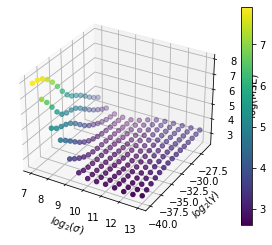

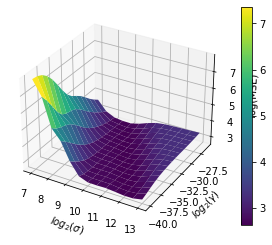

In [23]:
# 1.3.5.b
# we want to plot the mean cross validation MSE
n = mean_MSE
x = np.array(np.log2(sigma))
y = np.array(np.log2(gamma))
X,Y = np.meshgrid(x, y)
Z = np.log(n.T)

# we make a scatter plot 
scatterplot = plt.figure(1)
ax = plt.axes(projection='3d')
sc = ax.scatter(X, Y, Z, c=Z, cmap="viridis")
# we log the axes to get a smoother plot
ax.set_xlabel('$log_2(\sigma$)')
ax.set_zlabel("log(MSE)")
ax.set_ylabel('$log_2(\gamma$)')
scatterplot.colorbar(sc)

# we make a surface plot, to better visualise the minimum region
surfaceplot = plt.figure(2)
ax = plt.axes(projection='3d')
su = ax.plot_surface(X, Y, Z, cmap="viridis")
# we log the axes to get a smoother plot
ax.set_xlabel('$log_2(\sigma$)')
ax.set_zlabel("log(MSE)")
ax.set_ylabel('$log_2(\gamma$)')
surfaceplot.colorbar(su);

In [24]:
# 1.3.5.
print("MSEs:")
print("Training: {:.2f} |Test: {:.2f}".format(MSE_train, MSE_test), "|with optimal pairing sigma=2^{} and gamma=2^{:.0f}".format(np.log2(optimal_sigma), np.log2(optimal_gamma)))

MSEs:
Training: 10.04 |Test: 10.23 |with optimal pairing sigma=2^10.0 and gamma=2^-31


###part d

In [25]:
# 1.3.d
# we follow the exact same procedure as in a but repeat 20 times
# takes around 20 mins to run

#creating the vectors
gamma = np.array([2**(-i) for i in range(26,41)])
sigma = np.array([2**(i/2) for i in range(14,27)])

# we create some lists to append our data
split = 2/3
MSE_test = []
MSE_train = []
# we save the optimal gamma and sigma pairings for viewing later
optimals = []

for run in range(20):
  # we save the results of the cross validation
  five_fold_results = []

  # we create a new pseudo-random test and training set
  np.random.seed(run)
  training, test = train_test_split(data, split).splitting()

  for run in range(0,5):
    
    # we create our data slices 
    training_, validation = train_test_split(training, 1).five_fold_validation(run)
    valid_np = validation.drop(columns=["MEDV"]).to_numpy()
    valid_labels = validation["MEDV"].to_numpy()

    training_np = training_.drop(columns="MEDV").to_numpy()
    training_labels = training_["MEDV"].to_numpy()

    # we want to save all the MSEs for each gamma-sigma pairing in an array
    results_train = np.zeros((sigma.shape[0], gamma.shape[0]))
    results_valid = np.zeros((sigma.shape[0], gamma.shape[0]))

    # performing kernel ridge regression
    # we initialise our class once 
    krr = kernelised_ridge_regression(training_np, training_labels)
    
    #indexing for our arrays
    sig = 0
    for s in sigma:

      # we only need to compute these kernels once per sigma
      valid_kernel = krr.create_kernel(training_np, valid_np, s)
      training_kernel = krr.create_kernel(training_np, training_np, s)
      gam = 0
      for g in gamma:

        # we compute the error for each gamma, sigma pair
        krr.find_alpha(g, training_kernel)
        MSE = krr.error(training_kernel)
        MSEvalid = krr.error_to_test(valid_kernel, valid_labels)

        # we append the results
        results_train[sig, gam] = MSE
        results_valid[sig, gam] = MSEvalid

        # we increment the indices
        gam += 1
      sig += 1
    
    # appending our results to a list (3d array of dimensisons 5, 13, 15)
    five_fold_results.append(results_valid)

  # we create an array with the mean MSE of the five fold validation
  mean_MSE = np.mean(five_fold_results, axis=0)
  
  # we find the gamma, sigma pair that gives the lowest MSE
  optimal_sigma_index, optimal_gamma_index = np.unravel_index(np.argmin(mean_MSE, axis=None), mean_MSE.shape)
  optimal_sigma = sigma[optimal_sigma_index]
  optimal_gamma = gamma[optimal_gamma_index]
  optimals.append((np.log2(optimal_sigma), np.log2(optimal_gamma)))

  # we convert our data to numpy
  training_np = training.drop(columns="MEDV").to_numpy()
  training_labels = training["MEDV"].to_numpy()

  test_np = test.drop(columns="MEDV").to_numpy()
  test_labels = test["MEDV"].to_numpy()

  # we do regression with the optimal parameters to compare with test set
  krrt = kernelised_ridge_regression(training_np, training_labels)
  
  # we find the kernels
  training_kernel = krrt.create_kernel(training_np, training_np, optimal_sigma)
  test_kernel = krrt.create_kernel(training_np, test_np, optimal_sigma)
  
  # we find alpha
  krrt.find_alpha(optimal_gamma, training_kernel)

  # we find and append the MSEs in a list
  MSE_train.append(krrt.error(training_kernel))
  MSE_test.append(krrt.error_to_test(test_kernel,test_labels))
  

In [26]:
print("MSEs:")
print("Training: {:.2f} |Test: {:.2f}".format(np.mean(MSE_train,axis=0), np.mean(MSE_test,axis=0)), "|with mean optimal pairing sigma=2^{} and gamma=2^{:.0f}".format(np.mean(np.array(optimals)[:,0]), np.mean(np.array(optimals)[:,1])))


MSEs:
Training: 7.24 |Test: 13.80 |with mean optimal pairing sigma=2^9.625 and gamma=2^-32
